In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
df = pd.read_csv('../data/hhinc_ami_pumas_21.csv')

In [3]:
df.head(3)

,GEO_ID,30_50_ami,50_80_ami,80_100_ami,o100_ami,u30_ami,tot,u50_sh
0,400112,3262,5273,3361,42947,3414,58257,0.114596
1,400113,4295,5104,3508,27466,2759,43132,0.163544
2,400114,5099,8464,5079,22985,5965,47592,0.232476


## map percent below 50% AMI

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
#geo.head(2)

In [6]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

### join data to geo files

In [7]:
df = pd.merge(geo,df,how='left',left_on='joinid',right_on='GEO_ID')

In [8]:
df.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,GEO_ID,30_50_ami,50_80_ami,80_100_ami,o100_ami,u30_ami,tot,u50_sh
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,2505,5940,3247,37806,3082,52580,0.106257
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,3262,5273,3361,42947,3414,58257,0.114596


In [9]:
df.describe()

,ALAND20,AWATER20,joinid,GEO_ID,30_50_ami,50_80_ami,80_100_ami,o100_ami,u30_ami,tot,u50_sh
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,4628.133333,7602.400000,4299.400000,22702.200000,5183.733333,44415.866667,0.227937
std,1.990223e+08,9.764382e+05,5.235411,5.235411,1458.115509,2085.860829,1041.716358,9353.906428,1706.794969,7062.499981,0.076051
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,1775.000000,4095.000000,3024.000000,9545.000000,2759.000000,31437.000000,0.106257
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,3884.000000,5621.000000,3434.500000,16669.000000,3825.500000,41929.000000,0.170373
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,4819.000000,8302.000000,4199.000000,22964.000000,5213.000000,43773.000000,0.242821
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,5389.000000,9215.500000,4874.500000,27002.000000,6040.000000,48709.000000,0.292004
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,7029.000000,10452.000000,6384.000000,42947.000000,9326.000000,58257.000000,0.336673


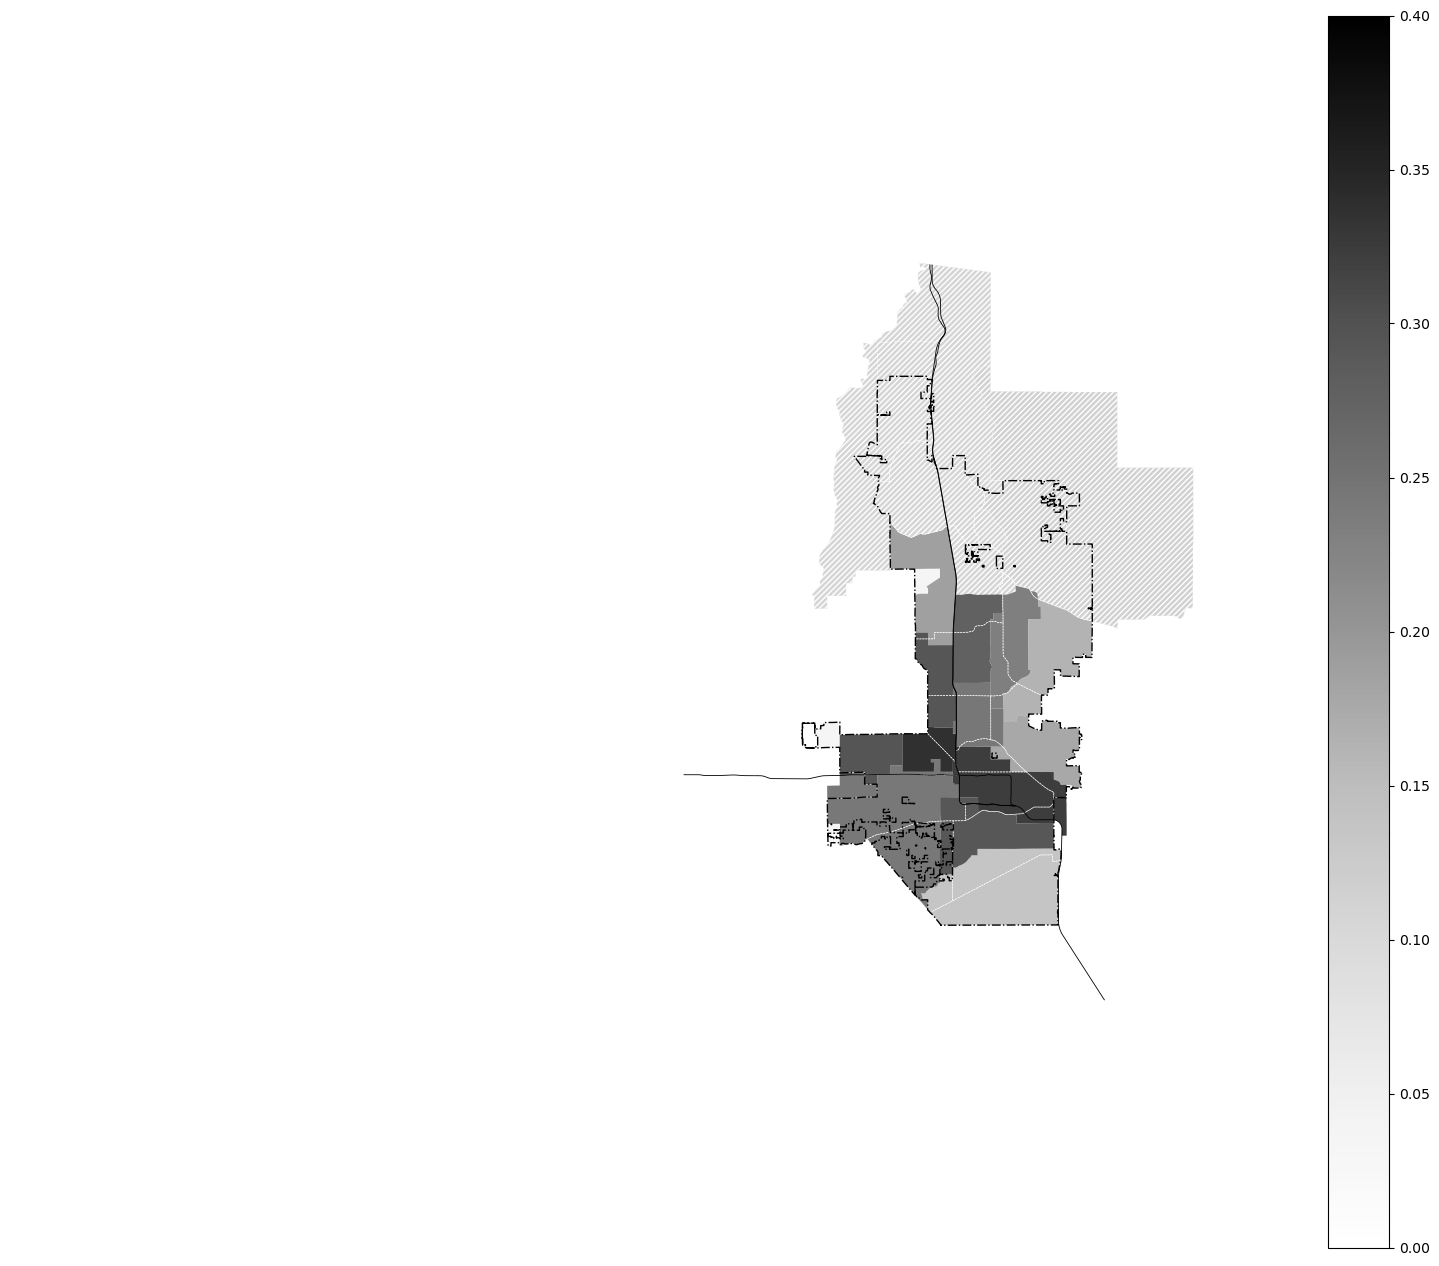

In [15]:
# percent under 50% AMI
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.0,vmax=0.4)
sm = plt.cm.ScalarMappable(cmap='Greys', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = 'u50_sh', cmap='Greys', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig('img/pct_u50AMI.jpg', dpi = 300) # saving each plot